In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('pokemon_data.csv')
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
# Describe
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
# Get the HP
df['HP']

0       45
1       60
2       80
3       80
4       39
5       58
6       78
7       78
8       78
9       44
10      59
11      79
12      79
13      45
14      50
15      60
16      40
17      45
18      65
19      65
20      40
21      63
22      83
23      83
24      30
25      55
26      40
27      65
28      35
29      60
      ... 
770     95
771     78
772     67
773     50
774     45
775     68
776     90
777     57
778     43
779     85
780     49
781     44
782     54
783     59
784     65
785     55
786     75
787     85
788     55
789     95
790     40
791     85
792    126
793    126
794    108
795     50
796     50
797     80
798     80
799     80
Name: HP, Length: 800, dtype: int64

In [12]:
# Filter by Fire type and legendary
new_df = df.loc[(df['Type 1'] == 'Fire') & (df['Legendary'] == True)]
new_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True
263,244,Entei,Fire,NaN,115,115,85,90,75,100,2,True
270,250,Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True
542,485,Heatran,Fire,Steel,91,90,106,130,106,77,4,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [19]:
# group by Type 1 and legendary
df['count'] = 1
df.groupby(['Type 1', 'Legendary']).count()['count'].head(10)

Type 1    Legendary
Bug       False        69
Dark      False        29
          True          2
Dragon    False        20
          True         12
Electric  False        40
          True          4
Fairy     False        16
          True          1
Fighting  False        27
Name: count, dtype: int64

In [28]:
df['Atk/Def'] = df.iloc[:, 5:7].sum(axis=1)

df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,count,Atk/Def,Atk Def
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1,98,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,1,125,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,1,165,165
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,1,223,223
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,1,95,95


In [34]:
df.sort_values(by=['Atk/Def'], ascending=False).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,count,Atk/Def,Atk Def
333,306,AggronMega Aggron,Steel,NaN,70,140,230,60,80,50,3,False,1,370,370
224,208,SteelixMega Steelix,Steel,Ground,75,125,230,55,95,30,2,False,1,355,355
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,1,340,340
268,248,TyranitarMega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False,1,314,314
789,713,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False,1,301,301
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,1,300,300
414,377,Regirock,Rock,NaN,80,100,200,50,100,50,3,True,1,300,300
413,376,MetagrossMega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,1,295,295
423,383,Groudon,Ground,NaN,100,150,140,100,90,90,3,True,1,290,290
332,306,Aggron,Steel,Rock,70,110,180,60,60,50,3,False,1,290,290


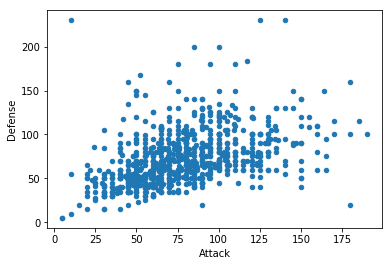

In [10]:
df.plot(x='Attack', y='Defense', kind='scatter')